In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Extract dataFrame out from CSV file

In [2]:
##convert csv into a DataFrame
houseData = pd.read_csv("train.csv")
##"<data>.dtypes" to get the data type for each column or series
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(houseData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


## Identify all the 'int64' variables & drop "categorical" integers

In [4]:
intDF = houseData.select_dtypes("int64")
intDF.head(n = 10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000



### Categorical Numeric
MsSubClass : MSSubClass: Identifies the type of dwelling involved in the sale

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

In [5]:
#Drop the 3 categorical Numeric
intDF = intDF.drop(["MSSubClass", "OverallQual", "OverallCond"], axis = 'columns')
intDF

,Id,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,8450,2003,2003,706,0,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
1,2,9600,1976,1976,978,0,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,11250,2001,2002,486,0,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
3,4,9550,1915,1970,216,0,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,14260,2000,2000,655,0,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,1999,2000,0,0,953,953,953,694,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,13175,1978,1988,790,163,589,1542,2073,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,9042,1941,2006,275,0,877,1152,1188,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,9717,1950,1996,49,1029,0,1078,1078,0,...,366,0,112,0,0,0,0,4,2010,142125


# EXERCISE 2


# SalePrice Summary Statistics

In [6]:
intDF["SalePrice"].describe()
SalePrice = pd.DataFrame(houseData['SalePrice'])

## Box Plot

<AxesSubplot:>

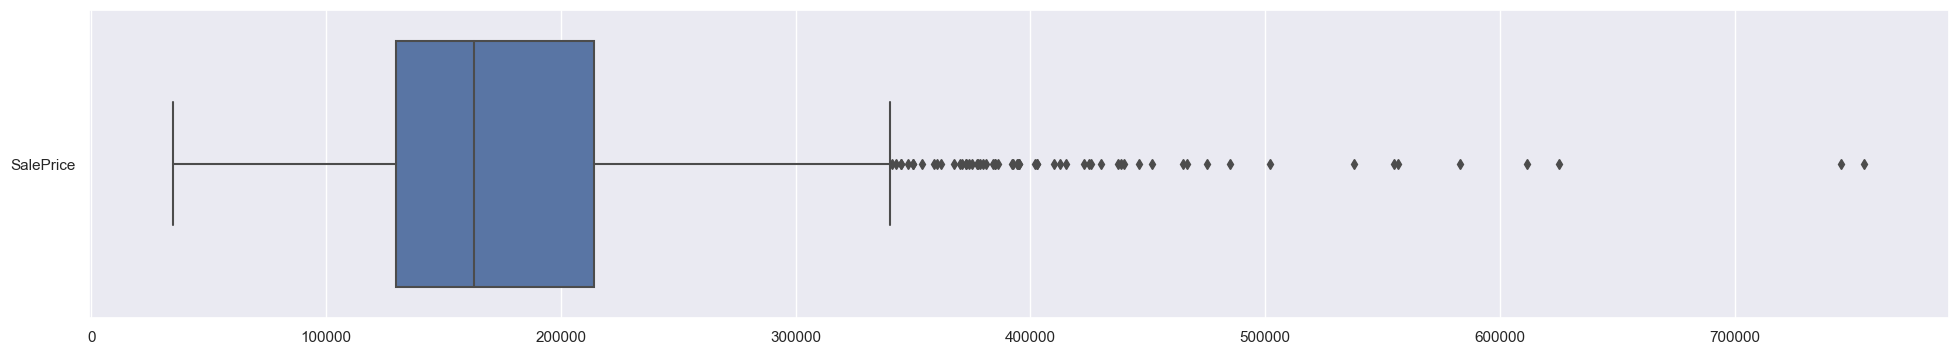

In [7]:
#To customize the height and width
f = plt.subplots(figsize=(24, 4))
sb.boxplot(data = SalePrice, orient = "h")

## Histogram Plot

<AxesSubplot:ylabel='Count'>

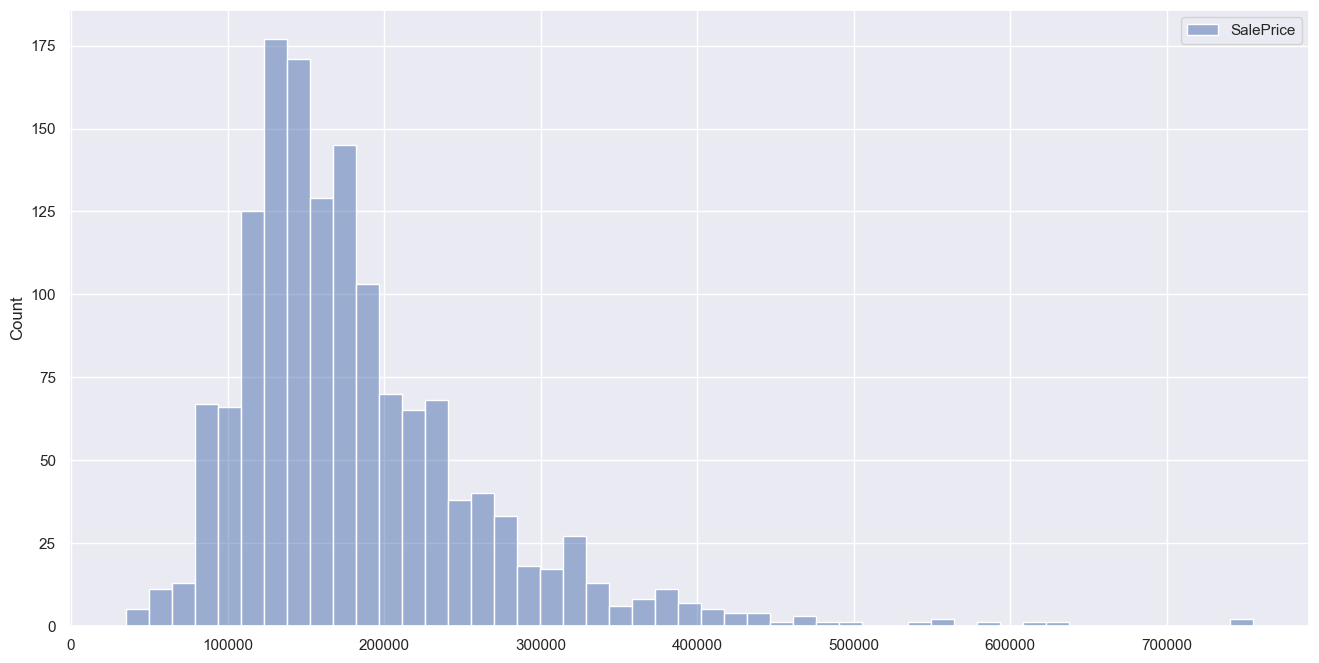

In [8]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = SalePrice)

## KDE Plot

<AxesSubplot:ylabel='Density'>

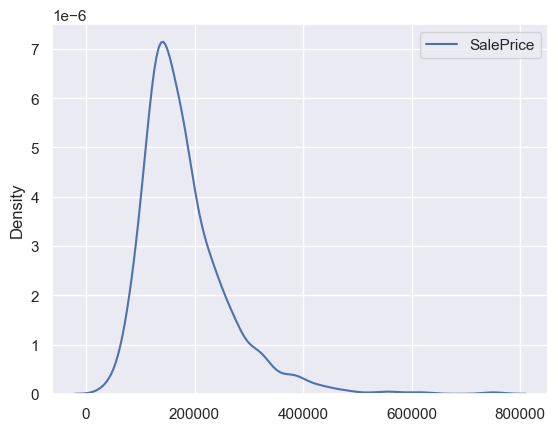

In [9]:
sb.kdeplot(data = SalePrice)

# LotArea Summary Statistics

In [10]:
intDF['LotArea'].describe()
LotArea = pd.DataFrame(houseData['LotArea'])

## Box Plot


<AxesSubplot:>

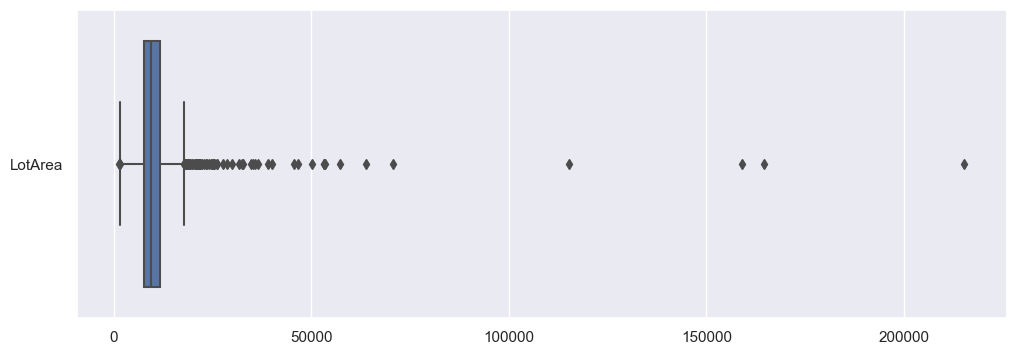

In [11]:
f = plt.subplots(figsize=(12,4))
sb.boxplot(data = LotArea, orient = "h")

## Histogram Plot

<AxesSubplot:ylabel='Count'>

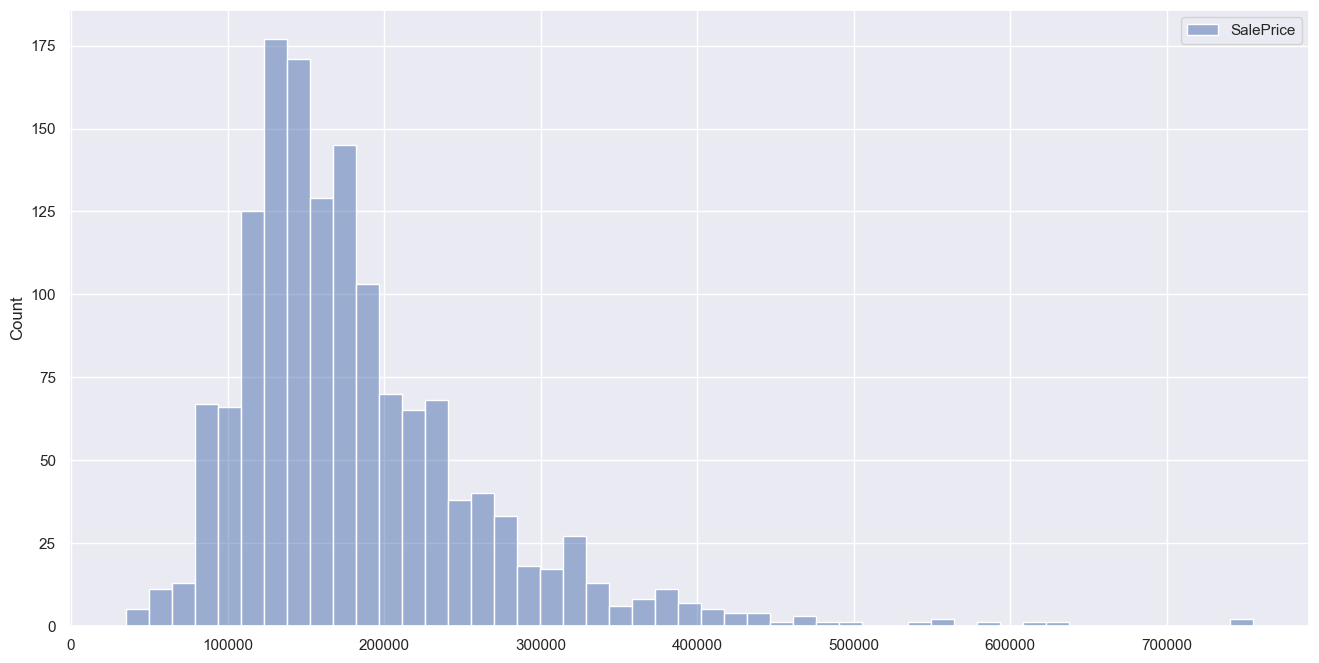

In [12]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = SalePrice)

## KDE Plot

<AxesSubplot:ylabel='Density'>

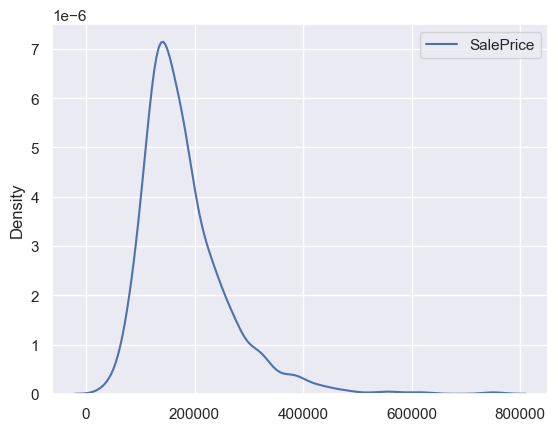

In [13]:
sb.kdeplot(data = SalePrice)

# JointPlot { SalePrice (y-axis) vs LotArea (x-axis) }

In [14]:
jointDF = pd.concat([SalePrice, LotArea], axis = 1).reindex()
jointDF

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


## Joint Plot Graph


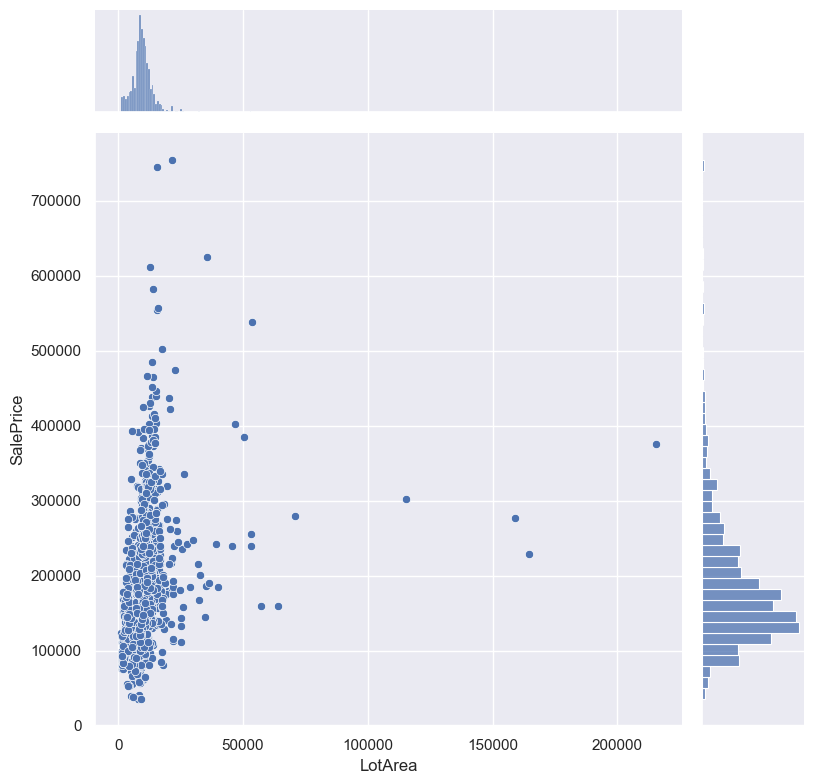

In [15]:
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 8)